In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
rcParams['figure.figsize'] = 12, 6

# Train/test/val subsets

## Формируем набор признаков и целевую переменную

In [2]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

In [3]:
df = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
target_col_name = dataset['target_names'][0]
df[target_col_name] = dataset['target']
del dataset

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.shape

(20640, 9)

In [6]:
X = pd.DataFrame(df['MedInc'])
y = df[target_col_name]

## Выделяем train/val/test

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
test_size = 0.2

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=test_size, shuffle=True, random_state=42)

In [9]:
del X_train_full, y_train_full

In [10]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(13209, 1) (13209,)
(3303, 1) (3303,)
(4128, 1) (4128,)


## Обучаем модель одномерной линейной регрессии

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
lr.coef_, lr.intercept_

(array([0.42119729]), 0.4373329192186539)

In [15]:
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)

## Оцениваем качество модели 

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
def get_metrics(y_true, y_predicted, n_digits=5):
    params = dict(y_true=y_true, y_pred=y_predicted)
    mse = mean_squared_error(**params)
    rmse = mean_squared_error(**params, squared=False)
    return dict(mse=round(mse, n_digits), rmse=round(rmse, n_digits))

In [18]:
get_metrics(y_train, y_train_pred)

{'mse': 0.69225, 'rmse': 0.83201}

In [19]:
get_metrics(y_val, y_val_pred)

{'mse': 0.72679, 'rmse': 0.85252}

Видим минимальную разницу в ошибках - это хорошо. Зачем её анализировать - узнаем в следующей лекции.  
Посмотрим на взаимосвязь предсказаний и значений зависимой переменной.

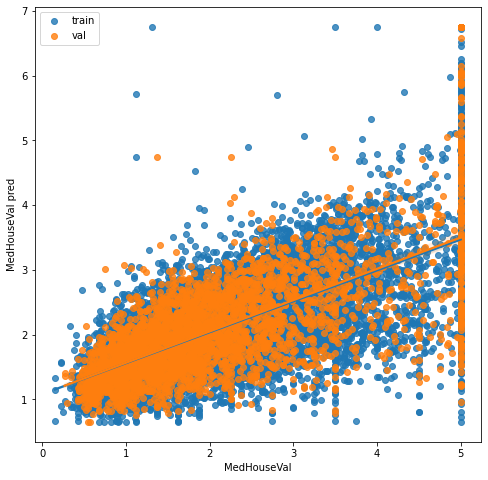

In [20]:
plt.figure(figsize=(8,8))
sns.regplot(x=y_train, y=y_train_pred, label='train')
sns.regplot(x=y_val, y=y_val_pred, label='val')
plt.ylabel(f'{target_col_name} pred')
plt.legend();

Мы предсказываем одну линию для всех наборов данных.

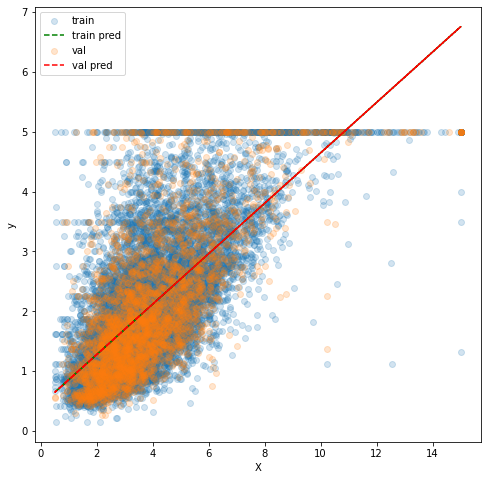

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(X_train, y_train, label='train', alpha=0.2)
plt.plot(X_train, y_train_pred, label='train pred', color='g', linestyle='dashed')
plt.scatter(X_val, y_val, label='val', alpha=0.2)
plt.plot(X_val, y_val_pred, label='val pred', color='r', linestyle='dashed')

plt.xlabel('X')
plt.ylabel('y')
plt.legend();

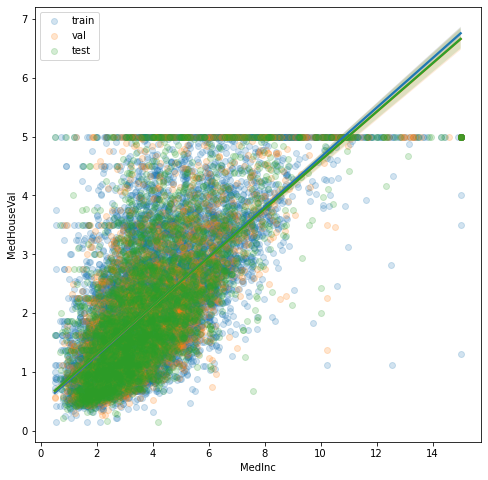

In [22]:
plt.figure(figsize=(8,8))
sns.regplot(x=X_train, y=y_train, label='train', scatter_kws={'alpha':0.2})
sns.regplot(x=X_val, y=y_val, label='val',scatter_kws={'alpha':0.2})
sns.regplot(x=X_test, y=y_test, label='test',scatter_kws={'alpha':0.2})
plt.legend();

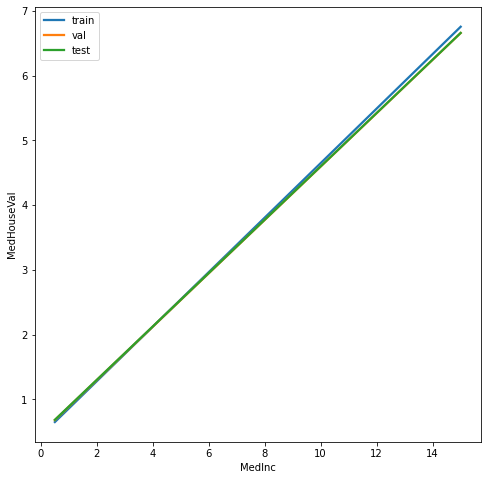

In [23]:
plt.figure(figsize=(8,8))
sns.regplot(x=X_train, y=y_train, label='train', scatter_kws={'alpha':0.1}, scatter=False, ci=0)
sns.regplot(x=X_val, y=y_val, label='val',scatter_kws={'alpha':0.1}, scatter=False, ci=0)
sns.regplot(x=X_test, y=y_test, label='test',scatter_kws={'alpha':0.1}, scatter=False, ci=0)
plt.legend();

# Масштабирование признаков (Feature scaling)

In [24]:
toy_df = pd.DataFrame({
    'Normal': np.random.normal(100, 50, 1000),
    'Exponential': np.random.exponential(25, 1000),
    'Uniform': np.random.uniform(-250, -50, 1000)
})

In [25]:
toy_df.head()

,Normal,Exponential,Uniform
0,63.926990,123.351749,-196.255357
1,165.372944,43.170921,-66.125030
2,88.165632,0.777887,-248.487850
3,159.470588,57.620038,-125.401097
4,104.935458,23.590989,-51.341304


In [26]:
def plot_scaling_result(data, scaled_data, scaling_title, x_lim=(-5, 5)):
    scaled_df = pd.DataFrame(
      scaled_data, 
      columns=['Normal', 'Exponential', 'Uniform']
    )

    fig, (ax1, ax2) = plt.subplots(ncols=2)
    ax1.set_xlim((-300, 300))
    ax1.set_title('No Scaling')
    sns.kdeplot(data.Normal, ax=ax1, label='Normal')
    sns.kdeplot(data.Exponential, ax=ax1, label='Exponential')
    sns.kdeplot(data.Uniform, ax=ax1, label='Uniform')

    ax2.set_xlim(x_lim)
    ax2.set_title(scaling_title)
    sns.kdeplot(scaled_df.Normal, ax=ax2, label='Normal')
    sns.kdeplot(scaled_df.Exponential, ax=ax2, label='Exponential')
    sns.kdeplot(scaled_df.Uniform, ax=ax2, label='Uniform')
    plt.legend();

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

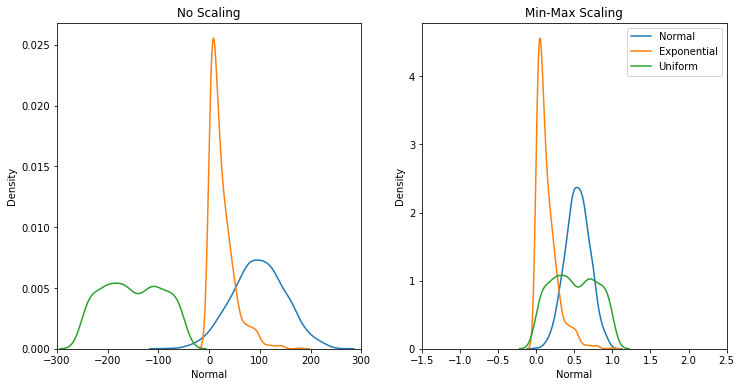

In [28]:
min_max_scaled = MinMaxScaler(feature_range=(0, 1)).fit_transform(toy_df)
plot_scaling_result(toy_df, min_max_scaled, 'Min-Max Scaling', (-1.5, 2.5))

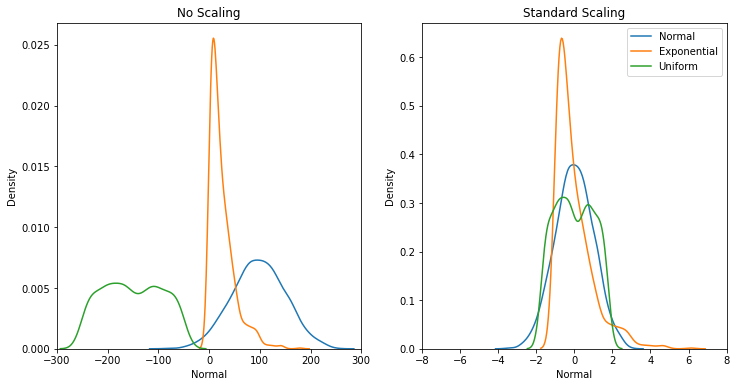

In [29]:
std_scaled = StandardScaler().fit_transform(toy_df)
plot_scaling_result(toy_df, std_scaled, 'Standard Scaling', (-8, 8))

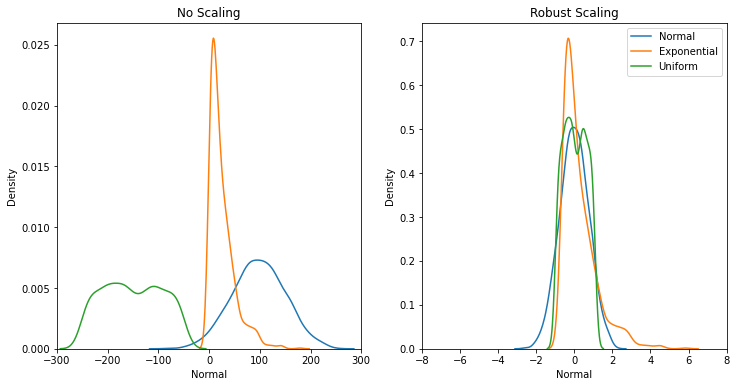

In [30]:
robust_scaled = RobustScaler().fit_transform(toy_df)
plot_scaling_result(toy_df, robust_scaled, 'Robust Scaling', (-8, 8))

# Многомерная линейная регрессия

In [31]:
def get_indices(X):
    train_full_id, test_id = train_test_split(X.index, test_size=test_size, shuffle=True, random_state=42)
    train_id, val_id = train_test_split(train_full_id, test_size=test_size, shuffle=True, random_state=42)
    return train_id, val_id, test_id

In [69]:
X = df.drop([target_col_name],axis=1)
y = df[target_col_name]

In [33]:
X.index

RangeIndex(start=0, stop=20640, step=1)

Будем выделять подвыборки с помощью индексов.

In [34]:
test_size = 0.2

train_id, val_id, test_id = get_indices(X)

In [35]:
X.loc[train_id].shape, X.loc[test_id].shape, X.loc[val_id].shape

((13209, 8), (4128, 8), (3303, 8))

Снова определяем линейную регрессию, чтоб обнулились веса.

In [36]:
lr = LinearRegression()

lr.fit(X.loc[train_id], y.loc[train_id])

lr.n_features_in_

8

In [37]:
lr.coef_, lr.intercept_

(array([ 4.51677294e-01,  9.61175544e-03, -1.25857507e-01,  7.81542768e-01,
        -7.34262763e-06, -3.97086853e-03, -4.16854763e-01, -4.29343454e-01]),
 -36.588488446812796)

In [38]:
y_train_pred = lr.predict(X.loc[train_id])
y_val_pred = lr.predict(X.loc[val_id])

In [39]:
get_metrics(y.loc[train_id], y_train_pred)

{'mse': 0.51291, 'rmse': 0.71617}

In [40]:
get_metrics(y.loc[val_id], y_val_pred)

{'mse': 0.53861, 'rmse': 0.7339}

Видим, что качество наших предсказаний улучшилось. Сравниваем модели только по mse на val наборе. Поскольку эта модель лучше, посмотрим, какой у неё перформанс на test set.

In [41]:
y_test_pred = lr.predict(X.loc[test_id])

In [42]:
get_metrics(y.loc[test_id], y_test_pred)

{'mse': 0.55447, 'rmse': 0.74463}

Мало отличается от перформанса на train set, это хорошо (даже лучше почему-то).

Выведем график ошибок.

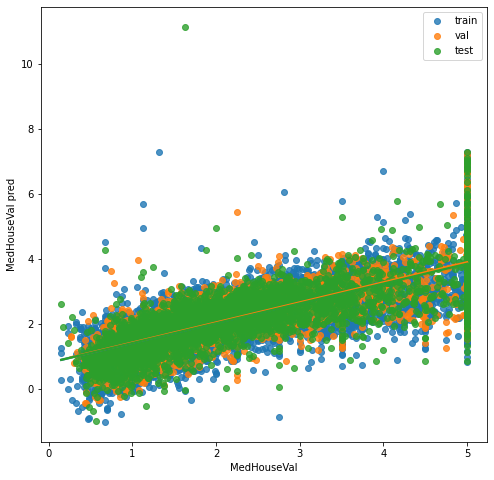

In [43]:
plt.figure(figsize=(8,8))
sns.regplot(x=y.loc[train_id], y=y_train_pred, label='train')
sns.regplot(x=y.loc[val_id], y=y_val_pred, label='val')
sns.regplot(x=y.loc[test_id], y=y_test_pred, label='test')
plt.ylabel(f'{target_col_name} pred')
plt.legend();

Видим, что точки больше сосредоточены вокруг диагонали - это значит модель лучше, ошибки меньше.

# Функция подсчёта метрик модели

Дальше мы будем обучать много моделей, потому определим функцию, которая считает метрики на трейне и тесте.

In [44]:
def evaluate_model(model, X_train, X_val, y_train, y_val):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_metrics = get_metrics(y_train, y_train_pred)
    val_metrics = get_metrics(y_val, y_val_pred)

    return dict(train=train_metrics, val=val_metrics)

# Многомерная лин. регрессия на отмасштабированных признаках
Проверим, будет ли влиять нормализация данных на точность предсказания на валидационных данных

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
min_max_scaler.fit(X.loc[train_id])
min_max_scaled = min_max_scaler.transform(X)
min_max_scaled_df = pd.DataFrame(min_max_scaled, columns=X.columns)

In [47]:
min_max_scaled_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.074521,0.048313,0.039869,0.003970,0.327142,0.476125
std,0.131020,0.246776,0.040611,0.031726,0.031740,0.017338,0.227471,0.199555
min,0.000000,0.000000,-0.000701,-0.002789,0.000000,0.000000,-0.002130,0.000000
25%,0.142308,0.333333,0.058300,0.042248,0.021974,0.002900,0.145900,0.253984
50%,0.209301,0.549020,0.071241,0.045107,0.032596,0.003549,0.181044,0.583665
75%,0.292641,0.705882,0.084754,0.048504,0.048264,0.004324,0.548456,0.631474
max,1.000000,1.000000,2.314705,2.255509,1.000000,2.074450,1.000000,1.000000


In [48]:
lr = LinearRegression()
lr.fit(min_max_scaled_df.loc[train_id], y.loc[train_id])

LinearRegression()

In [49]:
evaluate_model(lr, min_max_scaled_df.loc[train_id], min_max_scaled_df.loc[val_id], y.loc[train_id], y.loc[val_id])

{'train': {'mse': 0.51291, 'rmse': 0.71617},
 'val': {'mse': 0.53861, 'rmse': 0.7339}}

Видим, что скейлинг ничего не дал. Экспериментируем дальше.

## Интерпретируем коэффициенты линейной регрессии. 
Интерпретация возможна только если все переменные в одной шкале от 0 до 1.

In [50]:
lr.coef_

array([ 6.54941109,  0.49019953, -7.6676938 , 11.67429509, -0.26197761,
       -2.37863752, -3.91426622, -4.31060828])

Выведим важность признаков:

Feature: MedInc, Score: 6.549
Feature: HouseAge, Score: 0.490
Feature: AveRooms, Score: -7.668
Feature: AveBedrms, Score: 11.674
Feature: Population, Score: -0.262
Feature: AveOccup, Score: -2.379
Feature: Latitude, Score: -3.914
Feature: Longitude, Score: -4.311


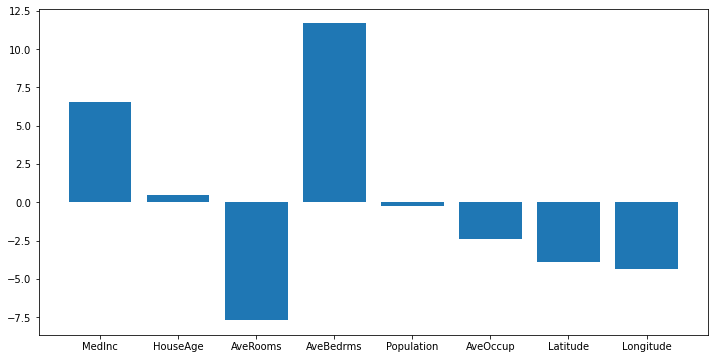

In [51]:
importance = lr.coef_
for feature_name, value in zip(X.columns, importance):
    print(f'Feature: {feature_name}, Score: {value:.3f}')

# построим график
xticks = range(len(importance))
plt.bar(xticks, importance)
plt.xticks()
plt.xticks(xticks, X.columns)
plt.show()

А в intercept_ хранится некоторое базовое значение предсказания, без учёта влияния признаков.

In [52]:
lr.intercept_

3.641418308269502

# Полиномиальная регрессия

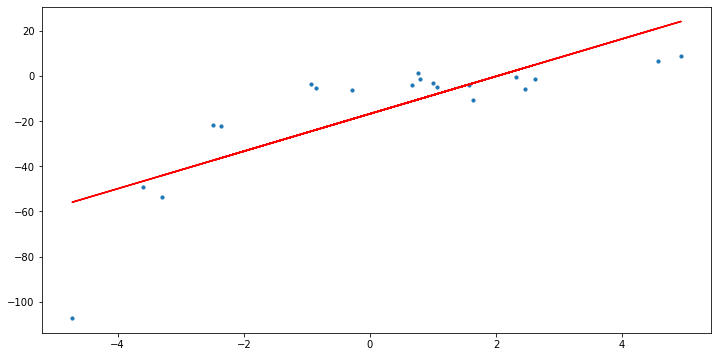

In [53]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

In [54]:
get_metrics(y, y_pred)

{'mse': 253.07218, 'rmse': 15.90824}

In [55]:
import operator 

from sklearn.preprocessing import PolynomialFeatures

In [56]:
PolynomialFeatures()

PolynomialFeatures()

In [65]:
def fit_poly_reg(x, y, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    display(get_metrics(y, y_poly_pred))
    return y_poly_pred, model

def plot_ploy_reg(x, y, y_poly_pred):
    plt.scatter(x, y, s=10)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color='m')
    plt.show()

PolynomialFeatures генерируют все полиномиальные комбинации признаков до указаной включительно. К примеру, если у нас есть признаки а и b, то будут сгенерированы дополительно признаки [1, a, b, a^2, ab, b^2].

In [66]:
y_poly_pred, model = fit_poly_reg(x, y, 2)

{'mse': 102.42325, 'rmse': 10.12044}

In [67]:
model.n_features_in_

3

У нас три признака, потому что 1, х и х^2.

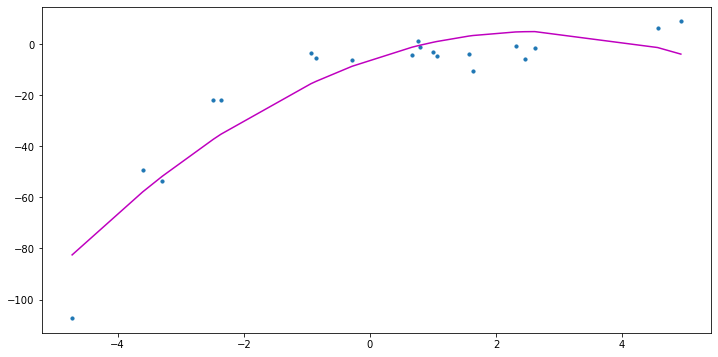

In [60]:
plot_ploy_reg(x, y, y_poly_pred)

Стало сильно лучше!

{'mse': 11.90178, 'rmse': 3.4499}

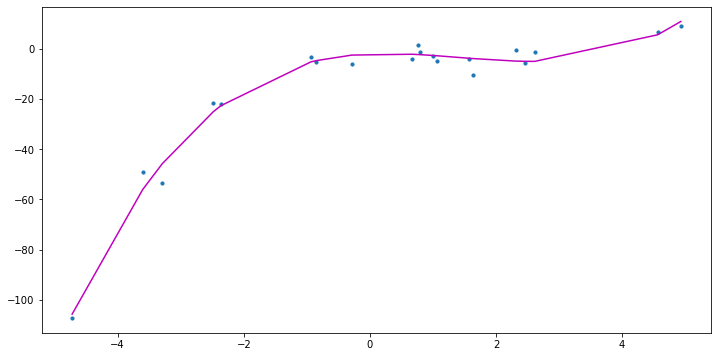

In [61]:
degree = 3
y_poly_pred, _ = fit_poly_reg(x, y, degree)
plot_ploy_reg(x, y, y_poly_pred)

Стало ещё лучше.

In [62]:
len(x)

20

{'mse': 1.23913, 'rmse': 1.11316}

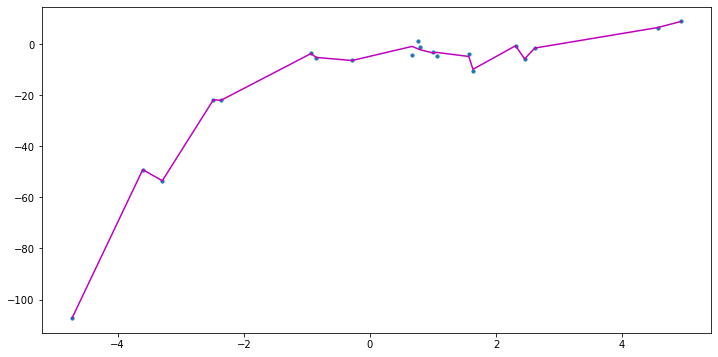

In [63]:
degree = 20
y_poly_pred, _ = fit_poly_reg(x, y, degree)
plot_ploy_reg(x, y, y_poly_pred)

А вот это уже переобучение.

## Применение полиномиальной регрессии на California Housing данных

## Один признак

Сначала посмотрим как повлияет налииче полиномиальных признаков в случае 1 признака

In [82]:
X = pd.DataFrame(df['MedInc'])
y = df[target_col_name]

In [83]:
X.shape

(20640, 1)

In [84]:
degree = 2
poly_features = PolynomialFeatures(degree=degree)
  
# трансформирует существующий набор признаков в набор признаков более высокой размерности
X_train_poly = poly_features.fit_transform(X.loc[train_id])
X_val_poly = poly_features.transform(X.loc[val_id])

# обучаем линейную регрессию на признаках высокой размерности
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y.loc[train_id])

LinearRegression()

In [85]:
X_train_poly.shape

(13209, 3)

In [86]:
evaluate_model(poly_model, X_train_poly, X_val_poly, y.loc[train_id], y.loc[val_id])

{'train': {'mse': 0.68661, 'rmse': 0.82862},
 'val': {'mse': 0.71853, 'rmse': 0.84766}}

Видим значимое улучшение и на трейне, и на валидейшене по сравнению с обучением модели LR без полиномиальных признаков (было выше в ноутбуке).

## Много признаков

А что если используем на всех признаках?

In [87]:
X = df.drop([target_col_name],axis=1)
y = df[target_col_name]

In [88]:
X.shape

(20640, 8)

In [92]:
degree = 2
poly_features = PolynomialFeatures(degree=degree)
  
X_train_poly = poly_features.fit_transform(X.loc[train_id])
X_val_poly = poly_features.transform(X.loc[val_id])

In [93]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y.loc[train_id])

LinearRegression()

In [94]:
evaluate_model(poly_model, X_train_poly, X_val_poly, y.loc[train_id], y.loc[val_id])

{'train': {'mse': 0.41744, 'rmse': 0.6461},
 'val': {'mse': 0.70228, 'rmse': 0.83802}}

Улучшение на трейне лучше, чем на тесте. Похоже, что немного переобучилась, но тем не менее качество всё же стало лучше.

Вместо 8 признаков у нас стало 45, что более чем в 5 раз больше.

In [96]:
poly_model.n_features_in_

45

# Регрессии с регуляризацией

In [95]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [99]:
models = [
    Ridge(), Lasso(), ElasticNet(), ElasticNet(alpha=0.5)
]

Посмотрим, какие параметры у ElasticNet по умолчанию.

In [97]:
ElasticNet().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [100]:
for model in models:
    model.fit(X.loc[train_id], y.loc[train_id])
    eval_results  = evaluate_model(model, X.loc[train_id], X.loc[val_id], y.loc[train_id], y.loc[val_id])
    print(f'{str(model)}: {eval_results}\n')

Ridge(): {'train': {'mse': 0.51291, 'rmse': 0.71617}, 'val': {'mse': 0.53861, 'rmse': 0.7339}}

Lasso(): {'train': {'mse': 0.94668, 'rmse': 0.97297}, 'val': {'mse': 0.98311, 'rmse': 0.99152}}

ElasticNet(): {'train': {'mse': 0.76083, 'rmse': 0.87226}, 'val': {'mse': 0.79062, 'rmse': 0.88917}}

ElasticNet(alpha=0.5): {'train': {'mse': 0.67638, 'rmse': 0.82243}, 'val': {'mse': 0.70554, 'rmse': 0.83996}}



Видим, что от модели и переданных в неё параметров зависит качество. Потому стоит научиться искать оптимальные гиперпараметры модели.